In [1]:
%matplotlib inline
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

from IPython import display

matplotlib.rcParams.update({'font.size': 14})

In [2]:
DIR_RUN = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_absgasonly',
                       'n2o',
                       'band_06_wn_1100_1215',
                       'absgas_various_PTs')

path_absgas = os.path.join(DIR_RUN, 'output_absgas.dat')

In [9]:
df = pd.read_csv(path_absgas, sep=r'\s+')
df = df.set_index(['v', 'ipt'])

ds = xr.Dataset.from_dataframe(df)
ds = ds.set_coords(['pressure', 'temperature'])

In [54]:
# find absth(1) for which dg = .68 at (50 mb, 250 K)
srs_50_250 = ds['absgas'].sel(ipt=6).to_pandas()

idx_dg = int(.68 * len(srs_50_250))
             
srs_50_250.sort_values().reset_index().iloc[51600]

v    1.308869e+03
0    2.484581e-21
Name: 51600, dtype: float64

In [ ]:
ds['absgas'].sel(ipt=6).to_pandas().hist

In [4]:
def plt_absgas(ax, ds, ipt=1, absth=None):
    df = ds['absgas'].sel(ipt=ipt)\
                    .to_dataframe()\
                    .drop('ipt', axis=1)\
                    .set_index(['pressure', 'temperature'], append=True)\
                    .unstack([1, 2])
                    
    df.columns = df.columns.droplevel(0)
    
    df.plot(ax=ax, color='grey', logy=True)
    
    ax.grid(b=True)
    ax.set_xlabel('wavenumber [$cm^{-1}$]')
    ax.set_ylabel('absgas [1]')
    
    if absth:
        [ax.axhline(y=thres, color='r') 
         for thres in absth]
        
    return ax


def get_absth1():
    return [1.40122e-20, 0.29564e-19, 0.24487e-18, 0.14920e-17]

In [5]:
ipts_sorted_by_pressure = ds.coords['pressure']\
                            .isel(v=0)\
                            .sel(ipt=range(1, 1 + 7))\
                            .to_pandas().sort_values().index

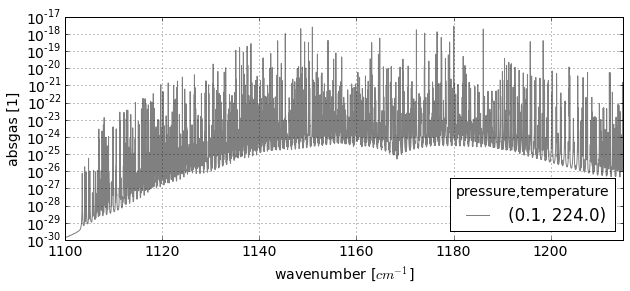

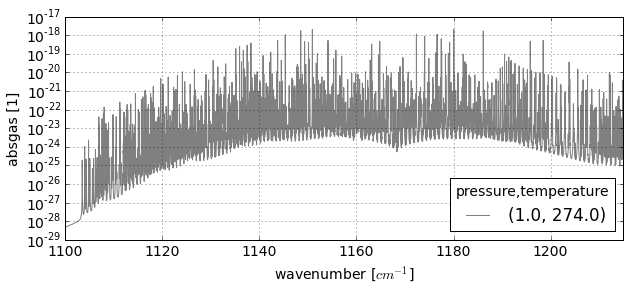

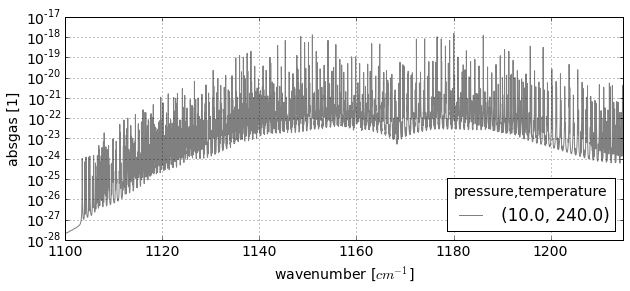

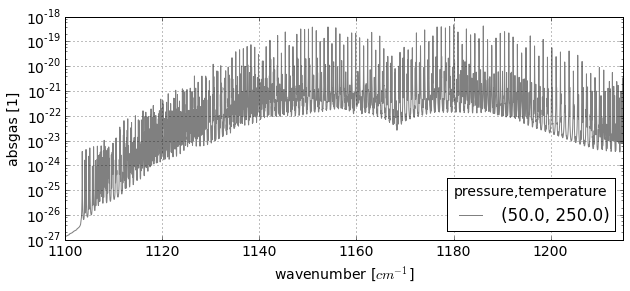

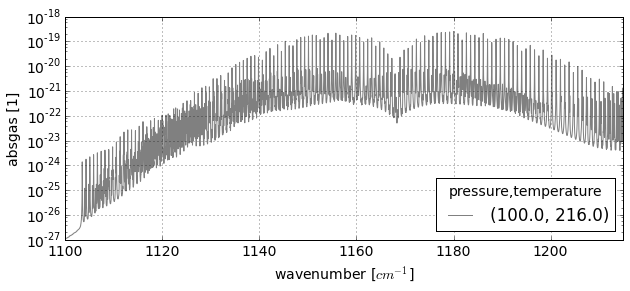

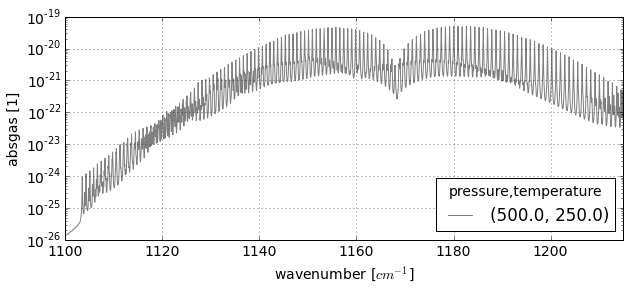

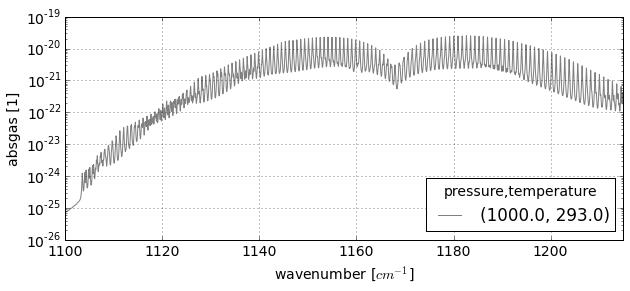

In [10]:
for ipt in ipts_sorted_by_pressure:
    fig, axs = plt.subplots(nrows=1, ncols=1,
                            figsize=(10, 4))
    axs = plt_absgas(axs, ds, ipt=ipt)

In [11]:
ds['absgas'].sel(ipt=7).max()

<xarray.DataArray 'absgas' ()>
array(5.0469443e-20)
Coordinates:
    ipt      int64 7

In [13]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')